In [113]:
#two dimensions of word distribution/semantic space assembled from two dense scaled singular vectors


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from scipy.sparse import find
from scipy.sparse.linalg import svds
from scipy.spatial.distance import pdist, squareform
from pickleshare import *

db = PickleShareDB('~/.ipython/profile_default/db/autorestore')

dictionary = db['dictionary']

dictionary_lookup = db['dictionary_lookup']

word_vectors_2d = db['word_vectors_2d']

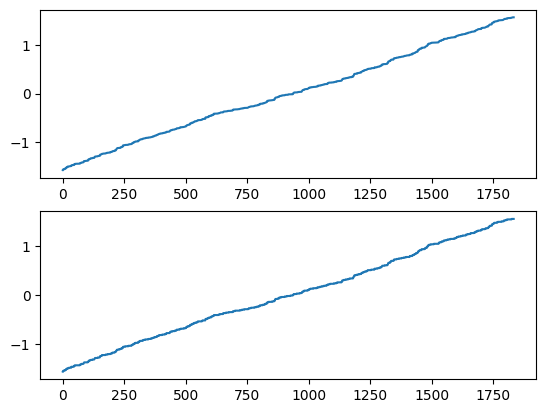

In [114]:


word_vectors_2d['magnitude'] = word_vectors_2d['x'].pow(2)+word_vectors_2d['y'].pow(2)

word_vectors_2d['angle'] = np.arctan(word_vectors_2d['y']/word_vectors_2d['x'])

angles = word_vectors_2d.angle.to_numpy()

angles = angles[angles.argsort()]

#word_vectors_2d.angle = word_vectors_2d.angle.round(2)

r_angles = word_vectors_2d.angle.round(2).to_numpy()

r_angles = r_angles[r_angles.argsort()]

fig = figure()
angle_values = fig.add_subplot(2,1,1)
angle_values.plot(angles)

angle_values = fig.add_subplot(2,1,2)
angle_values.plot(r_angles)

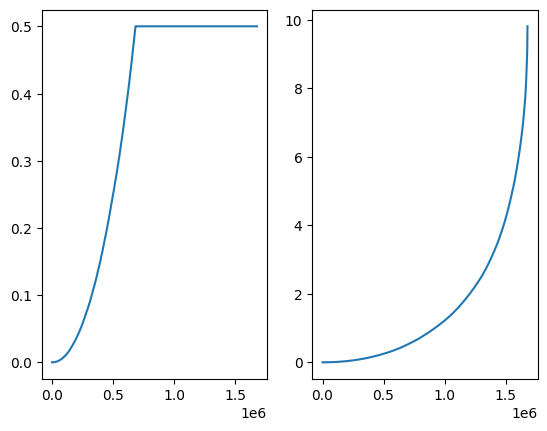

In [115]:
angles = word_vectors_2d.angle.to_numpy()

angles = angles[angles.argsort()]

angles_dif_matrix = np.reshape(angles, (len(angles), 1))
angles_dif_matrix = angles_dif_matrix - angles_dif_matrix.transpose()

preclip_angles_dif_matrix = np.square(angles_dif_matrix)

angles_dif_matrix = np.clip(preclip_angles_dif_matrix,0,0.5)

preclip_condensed_angles = squareform(preclip_angles_dif_matrix)

condensed_angles = squareform(angles_dif_matrix)

fig = figure()
condensed_angles_visualization = fig.add_subplot(1,2,1)

condensed_angles_visualization.plot(condensed_angles[np.argsort(condensed_angles)])

condensed_angles_visualization = fig.add_subplot(1,2,2)

condensed_angles_visualization.plot(preclip_condensed_angles[np.argsort(preclip_condensed_angles)])


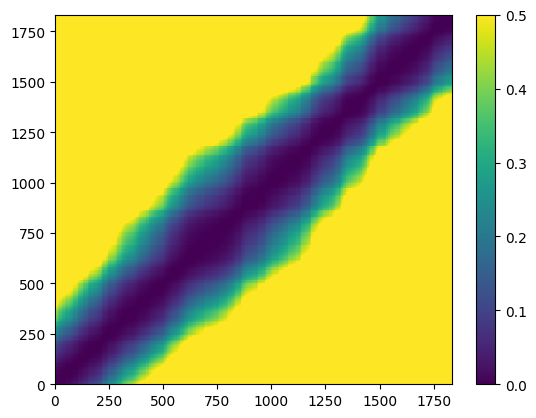

In [116]:

fig = figure()
angles_visualization = fig.add_subplot(1,1,1)
apc = angles_visualization.pcolormesh(angles_dif_matrix)
fig.colorbar(apc)

In [117]:

pd.set_option('max_colwidth', None)
word_vectors_2d.angle.round(2).sort_values().to_frame().reset_index(names=['latent_topics']).groupby('angle').agg(tuple).head(20)


,latent_topics
angle,
-1.57,"(pakistan,)"
-1.56,"(perth, swimmer)"
-1.55,"(plessis, darwin, banned, kicking, property)"
-1.54,"(ref, women, asian, uzbek)"
-1.53,"(donald, public)"
-1.52,"(ride, holden)"
-1.51,"(corruption, drinking, trucked, towns)"
-1.50,"(slump, tighten, prescribed, dept, procedures)"
-1.49,"(resumes, humiliated, visit, aussies, yacht, charity, draft, abandoned, bike, t20)"


In [120]:
query = dictionary_lookup[10]

query

'weigh'

In [121]:
distance = word_vectors_2d['x'].to_frame()

distance['y'] = word_vectors_2d['y']

distance['x_2'] = distance.x.loc[query]

distance['y_2'] = distance.y.loc[query]

distance['dist'] = ((distance.x_2-distance.x)**2 + (distance.y_2-distance.y)**2)**(1/2)

distance.sort_values('dist', ascending=True).head(20)

,x,y,x_2,y_2,dist
weigh,1.562672e-16,1.333219e-17,1.562672e-16,1.333219e-17,0.000000e+00
exit,1.289122e-16,3.386746e-17,1.562672e-16,1.333219e-17,3.420518e-17
options,1.289122e-16,3.386746e-17,1.562672e-16,1.333219e-17,3.420518e-17
irrigators,1.289122e-16,3.386746e-17,1.562672e-16,1.333219e-17,3.420518e-17
way,2.007477e-16,5.305958e-17,1.562672e-16,1.333219e-17,5.963873e-17
wheels,2.007477e-16,5.305958e-17,1.562672e-16,1.333219e-17,5.963873e-17
lindsay,1.570895e-16,-4.837722e-17,1.562672e-16,1.333219e-17,6.171489e-17
promoted,1.570895e-16,-4.837722e-17,1.562672e-16,1.333219e-17,6.171489e-17
reshuffle,1.570895e-16,-4.837722e-17,1.562672e-16,1.333219e-17,6.171489e-17
cabinet,1.570895e-16,-4.837722e-17,1.562672e-16,1.333219e-17,6.171489e-17


In [123]:
distance = word_vectors_2d['angle'].to_frame()

distance['angle_2'] = distance.angle.loc[query]

distance['dist'] = (distance.angle_2 - distance.angle).abs()

distance.sort_values('dist', ascending=True).head(20)

,angle,angle_2,dist
weigh,0.085111,0.085111,0.000000
mine,0.085123,0.085111,0.000013
impact,0.087446,0.085111,0.002336
turkey,0.087790,0.085111,0.002680
vegetable,0.090633,0.085111,0.005523
question,0.090633,0.085111,0.005523
tbirds,0.092305,0.085111,0.007195
kestrels,0.092305,0.085111,0.007195
swifts,0.092305,0.085111,0.007195
war,0.076769,0.085111,0.008341
